In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import pandas.testing as tm
import seaborn as sns
from matplotlib import pyplot as plt
#import pandas.util.testing as tm
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('/content/drive/My Drive/credit card/creditcard.csv')

In [6]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

This data frame has 284807 rows and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284060,172115.0,2.069569,-0.837070,-0.225787,-0.085379,-1.213816,-0.619075,-0.874729,-0.099849,-0.008779,...,-0.560118,-1.058202,0.468126,-0.087009,-0.680611,-0.020394,0.011118,-0.030869,24.99,0
223475,143400.0,2.032949,-0.053701,-1.774779,0.279496,0.475885,-0.701279,0.383199,-0.208660,0.370195,...,0.043347,0.269176,0.060734,0.780566,0.332120,-0.275871,-0.048047,-0.069265,9.39,0
112980,72878.0,-0.663649,0.382237,0.586369,-1.450981,-0.802590,-1.484491,0.073707,0.266853,-1.081694,...,0.319355,0.819814,-0.027713,0.730306,-0.289635,-0.347499,0.263921,0.155014,20.00,0
242645,151580.0,0.159958,0.988025,-1.296998,-0.451972,0.944707,-0.375045,0.960125,-0.187646,0.168151,...,0.209675,0.852629,-0.282106,-1.191007,-0.246051,-0.180153,-0.641313,-0.537836,42.81,0
284668,172660.0,1.786326,-0.389739,-0.817163,1.247810,-0.184970,-0.132745,-0.165448,0.033821,0.558074,...,0.123585,0.286509,0.050191,-0.433841,-0.054956,-0.657182,0.014365,-0.038419,91.20,0


In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('display.precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


<Axes: title={'center': 'Distribution of Time Feature'}, xlabel='Time', ylabel='Count'>

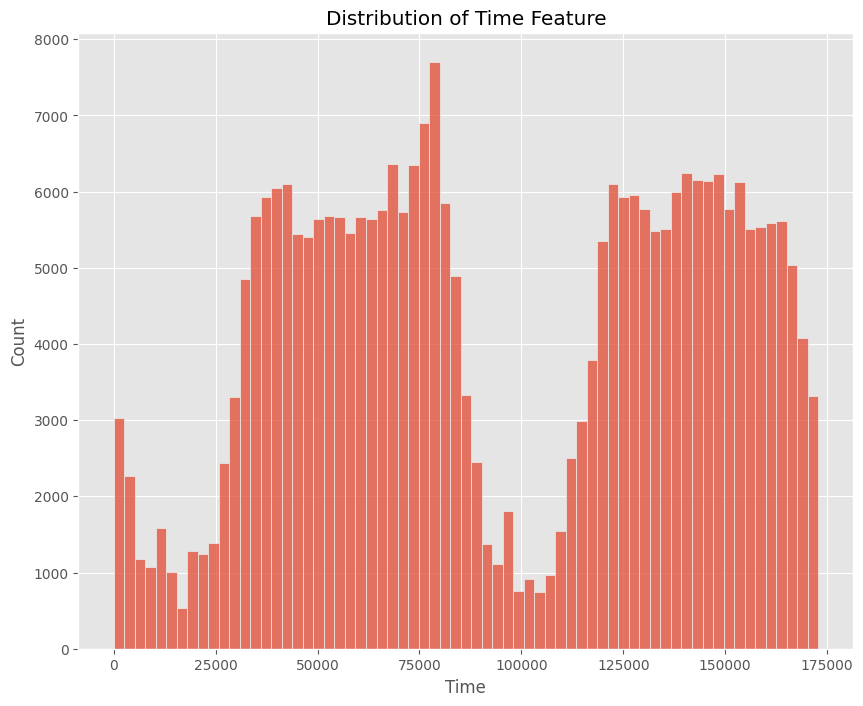

In [17]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.histplot(df.Time)


<Axes: title={'center': 'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Count'>

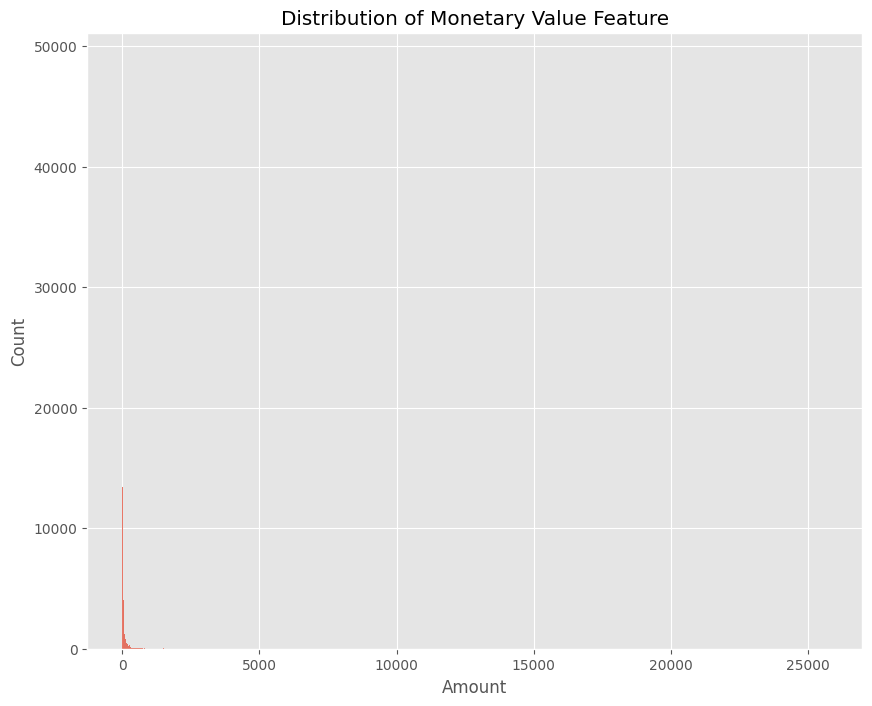

In [20]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.histplot(df.Amount)

In [21]:
#fraud vs. normal transactions
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))


There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

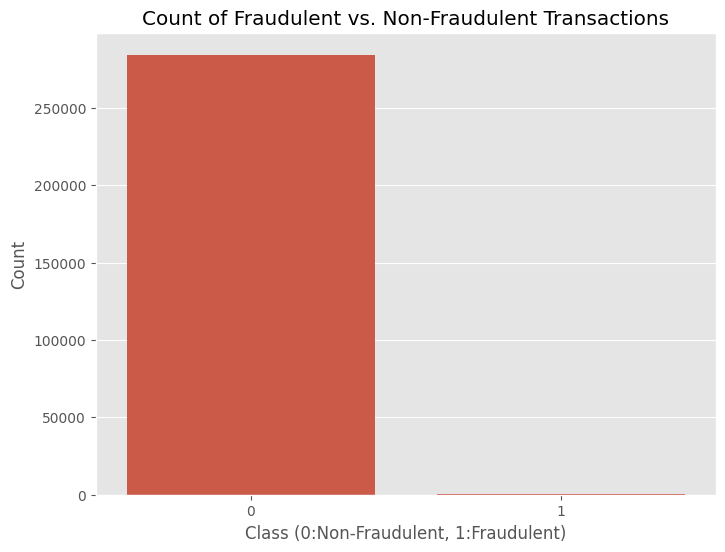

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [23]:
corr = df.corr()
corr


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.136e-16,-1.228e-15,-9.215e-16,1.813e-17,-6.507e-16,-1.005e-15,-2.434e-16,-1.514e-16,...,-2.457e-16,-4.291e-16,6.169e-16,-4.425e-17,-9.606e-16,-1.581e-17,1.198e-16,2.083e-15,-2.277e-01,-1.013e-01
V2,-0.011,4.136e-16,1.000e+00,3.244e-16,-1.121e-15,5.158e-16,2.787e-16,2.056e-16,-5.377e-17,1.978e-17,...,-8.480e-17,1.526e-16,1.634e-16,1.248e-17,-4.479e-16,2.057e-16,-4.967e-16,-5.094e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.228e-15,3.244e-16,1.000e+00,4.711e-16,-6.539e-17,1.628e-15,4.895e-16,-1.269e-15,5.568e-16,...,5.706e-17,-1.134e-15,-4.983e-16,2.687e-19,-1.105e-15,-1.238e-16,1.046e-15,9.776e-16,-2.109e-01,-1.930e-01
V4,-0.105,-9.215e-16,-1.121e-15,4.711e-16,1.000e+00,-1.720e-15,-7.492e-16,-4.105e-16,5.697e-16,6.923e-16,...,-1.950e-16,-6.276e-17,9.164e-17,1.585e-16,6.071e-16,-4.247e-16,3.977e-17,-2.761e-18,9.873e-02,1.334e-01
V5,0.173,1.813e-17,5.158e-16,-6.539e-17,-1.720e-15,1.000e+00,2.408e-16,2.716e-16,7.437e-16,7.392e-16,...,-3.921e-16,1.254e-16,-8.429e-18,-1.149e-15,4.809e-16,4.320e-16,6.590e-16,-5.614e-18,-3.864e-01,-9.497e-02
V6,-0.063,-6.507e-16,2.787e-16,1.628e-15,-7.492e-16,2.408e-16,1.000e+00,1.192e-16,-1.104e-16,4.131e-16,...,5.833e-17,-4.705e-19,1.047e-16,-1.072e-15,4.563e-16,-1.357e-16,-4.452e-16,2.595e-16,2.160e-01,-4.364e-02
V7,0.085,-1.005e-15,2.056e-16,4.895e-16,-4.105e-16,2.716e-16,1.192e-16,1.000e+00,3.344e-16,1.123e-15,...,-2.028e-16,-8.899e-16,-4.387e-16,7.435e-18,-3.094e-16,-9.658e-16,-1.782e-15,-2.777e-16,3.973e-01,-1.873e-01
V8,-0.037,-2.434e-16,-5.377e-17,-1.269e-15,5.697e-16,7.437e-16,-1.104e-16,3.344e-16,1.000e+00,4.356e-16,...,3.893e-16,2.027e-16,6.377e-17,-1.047e-16,-4.653e-16,-1.727e-16,1.300e-16,-6.201e-16,-1.031e-01,1.988e-02
V9,-0.009,-1.514e-16,1.978e-17,5.568e-16,6.923e-16,7.392e-16,4.131e-16,1.123e-15,4.356e-16,1.000e+00,...,1.937e-16,-7.072e-16,-5.214e-16,-1.430e-16,6.758e-16,-7.889e-16,-6.710e-17,1.111e-15,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

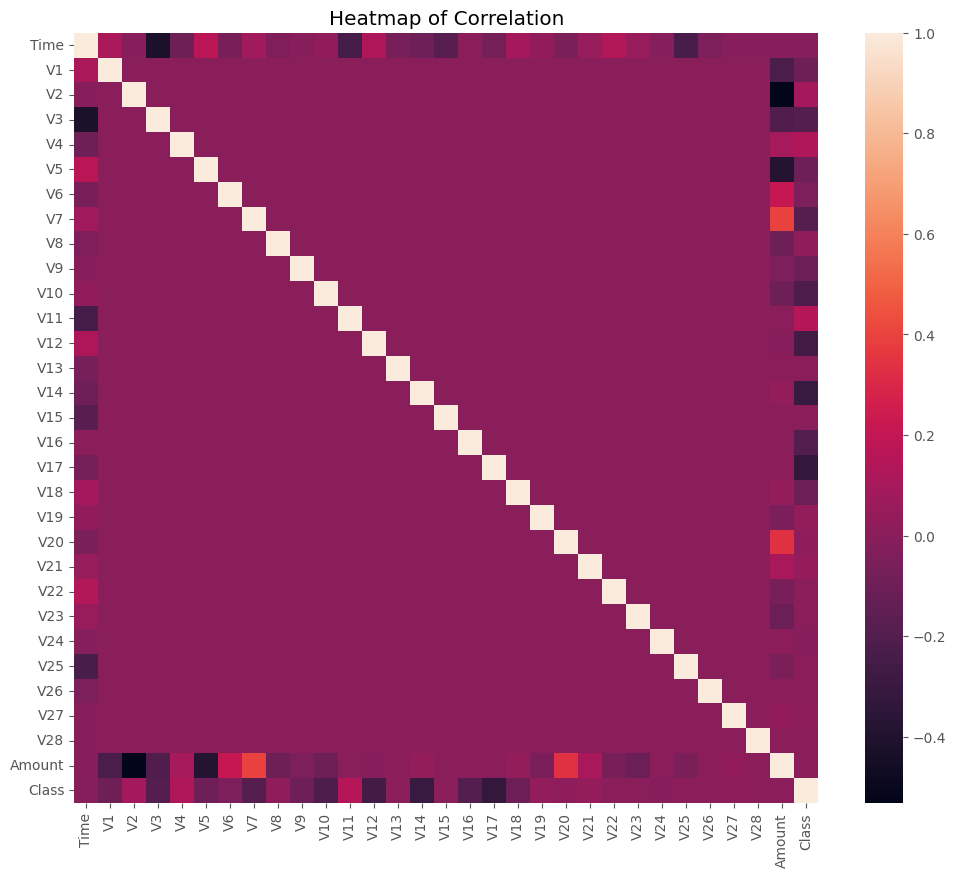

In [24]:

#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')


In [25]:
#skewness
skew_ = df.skew()
skew_

,0
Time,-0.036
V1,-3.281
V2,-4.625
V3,-2.240
V4,0.676
V5,-2.426
V6,1.827
V7,2.554
V8,-8.522
V9,0.555


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)


In [27]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)


In [28]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
260739,159699.0,-1.498,0.636,-0.424,0.773,-0.508,-0.290,-0.115,0.466,0.449,...,0.578,-0.054,-2.455,-1.373,-7.269e-01,0.185,66.40,0,-0.088,1.366
79131,57879.0,0.407,-1.674,0.681,0.589,-1.602,-0.242,-0.089,-0.064,1.136,...,-0.289,0.485,-0.012,0.898,-1.114e-01,0.087,424.98,0,1.346,-0.778
108286,70837.0,1.024,0.034,0.267,1.114,-0.190,-0.213,0.101,0.157,-0.160,...,0.212,-0.105,0.061,-0.825,-6.295e-04,0.023,67.49,0,-0.083,-0.505
260314,159494.0,-1.403,-1.194,-0.702,-0.847,0.293,-0.659,-0.118,0.524,-1.076,...,0.108,-0.850,-0.357,-0.030,3.168e-01,0.017,153.50,0,0.260,1.362
185099,126514.0,2.010,-0.420,-1.049,0.162,-0.287,-0.533,-0.309,0.026,0.799,...,0.181,-0.404,-0.270,0.567,-8.185e-02,-0.078,10.00,0,-0.313,0.668


In [29]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [30]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))


Train Shape: (256484, 31)
Test Shape: (28323, 31)


In [31]:

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [32]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))


There are 449 fraudulent transactions in the train data.


In [33]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [34]:
selected = non_fraud.sample(no_of_frauds)
selected.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
254883,-0.618,0.957,0.408,-1.386,1.328,-0.807,1.178,-0.060,-0.294,-1.626,...,-1.316,-0.288,0.349,0.797,0.129,-0.170,-0.059,0,-0.348,1.611
201482,-0.632,1.443,-0.643,-0.592,0.995,-0.185,0.580,0.474,-0.488,-1.339,...,0.498,-0.287,0.308,-0.090,0.550,0.254,0.196,0,-0.349,1.025
188758,2.109,-0.199,-1.392,0.272,0.033,-0.861,0.049,-0.189,0.860,0.127,...,-0.973,0.276,-0.704,-0.267,0.245,-0.083,-0.071,0,-0.345,0.902
157015,1.945,-0.273,-0.126,0.436,-0.841,-1.027,-0.324,-0.216,0.809,-0.043,...,-0.482,0.466,0.482,-0.668,0.199,-0.034,-0.034,0,-0.257,0.570
139833,-0.505,0.832,2.401,-0.105,0.112,-0.342,0.584,-0.296,1.468,-1.153,...,-0.410,-0.286,-0.050,0.277,-0.732,-0.081,-0.144,0,-0.308,0.223


In [35]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)


In [36]:
subsample = pd.concat([selected, fraud])
len(subsample)


898

In [37]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-2.007,3.677,-5.464,7.232,-1.628,-0.997,-4.300,2.269,-3.651,-4.401,...,-0.064,0.168,-0.450,2.370e-02,0.537,0.486,-0.042,1,-0.349,1.024
1,-0.100,2.795,-6.424,3.248,-1.632,-2.767,-2.312,0.961,-1.896,-4.919,...,0.127,0.204,0.008,-1.745e-01,0.575,0.153,-0.098,1,0.026,1.085
2,-1.034,-0.137,0.146,-1.846,-0.259,-0.965,-0.483,0.290,-0.503,-0.197,...,0.772,-0.434,-0.090,4.474e-02,-0.229,-0.221,-0.361,0,-0.237,0.850
3,-5.314,2.664,-4.251,0.395,-0.391,0.684,-5.134,-7.908,0.215,-2.298,...,-2.716,0.484,0.079,3.111e-01,0.556,0.177,0.363,1,-0.349,0.711
4,-1.510,1.035,1.146,-0.024,0.015,0.570,0.009,0.740,-0.239,-0.275,...,0.030,-0.012,-0.270,-2.041e-01,0.246,-0.205,0.143,0,-0.310,-0.214
5,-1.094,1.021,1.263,-0.968,-0.123,0.554,-0.843,-2.479,0.180,-1.263,...,0.819,-0.139,-0.515,-7.051e-02,1.034,0.279,0.200,0,-0.289,-1.199
6,-1.153,0.715,1.944,3.086,-0.405,0.833,-0.632,0.962,-1.025,0.634,...,0.911,-0.014,0.258,-4.022e-01,0.344,0.319,0.077,0,-0.201,-0.739
7,1.246,0.167,0.488,0.635,-0.563,-1.011,0.015,-0.160,0.170,-0.045,...,-0.816,0.140,0.358,1.864e-01,0.097,-0.036,0.018,0,-0.317,-0.699
8,-5.905,4.440,-8.632,7.789,-4.990,-1.200,-7.674,4.126,-5.316,-4.891,...,1.266,-0.199,0.015,-1.908e-05,0.544,-1.168,-1.206,1,-0.171,0.605
9,0.793,-0.669,1.085,1.445,-0.782,1.163,-0.749,0.605,0.933,-0.128,...,-0.109,-0.012,-0.336,1.520e-01,-0.405,0.068,0.035,0,0.135,-1.179


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

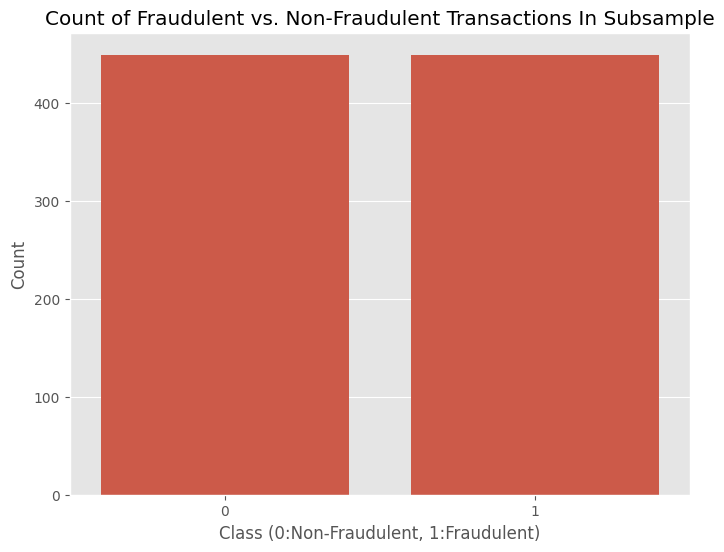

In [38]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [39]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.429
V2,0.487
V3,-0.572
V4,0.716
V5,-0.369
V6,-0.425
V7,-0.467
V8,0.034
V9,-0.556
V10,-0.620


In [40]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]


,Class
V3,-0.572
V9,-0.556
V10,-0.620
V12,-0.679
V14,-0.751
V16,-0.597
V17,-0.558


In [41]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]


,Class
V4,0.716
V11,0.687
Class,1.000


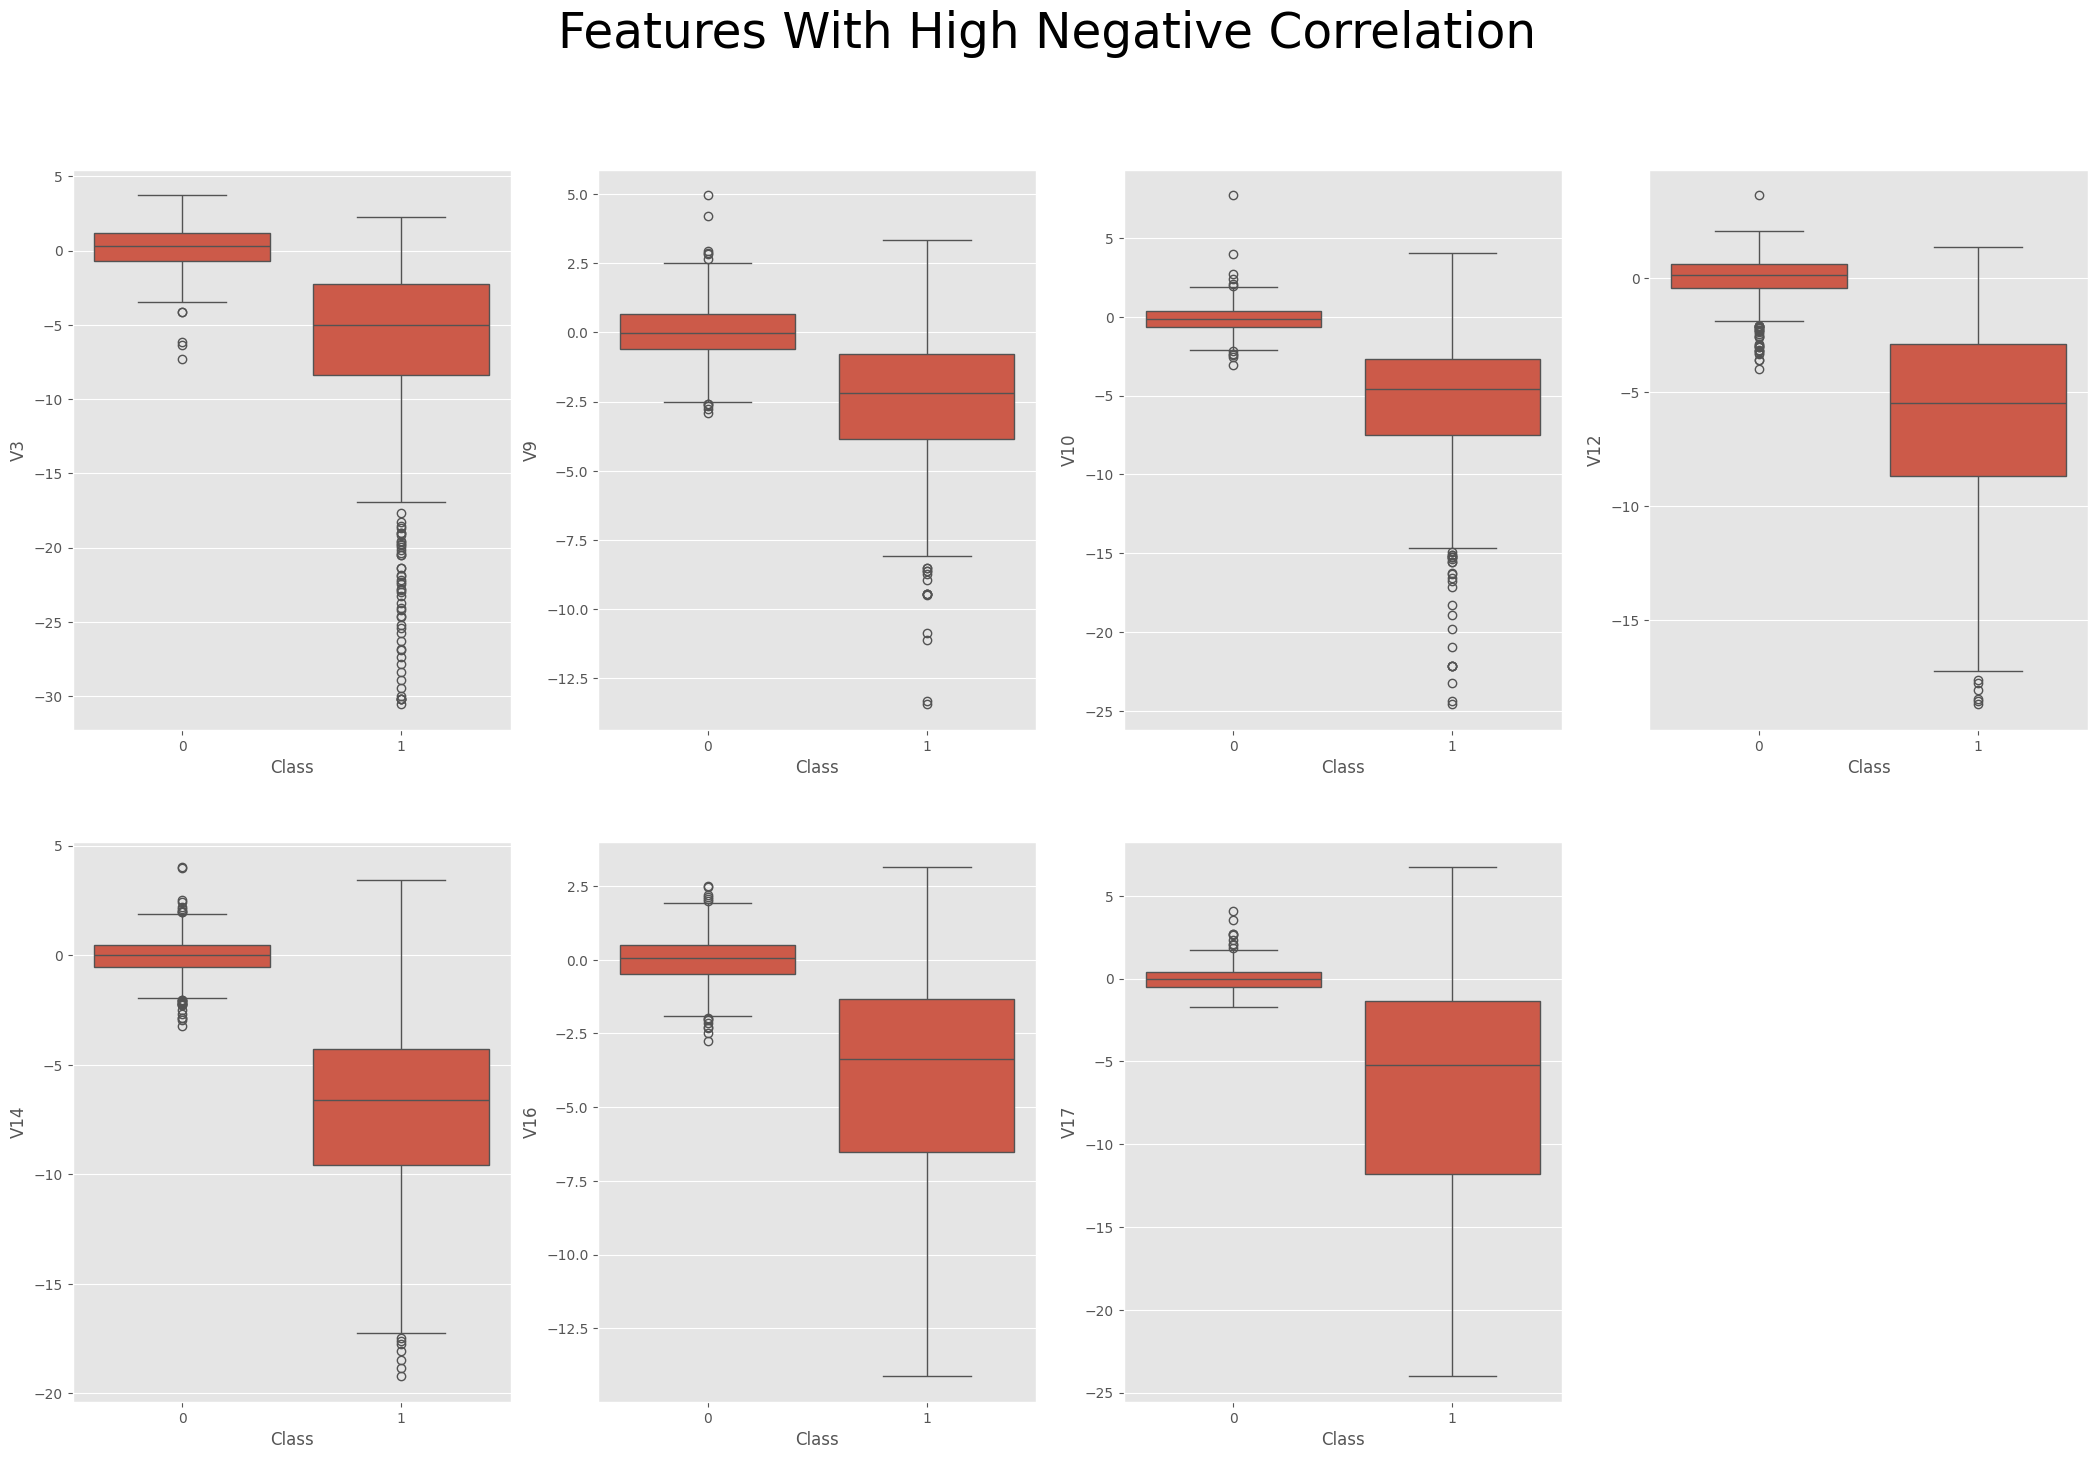

In [42]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<Axes: xlabel='Class', ylabel='V11'>

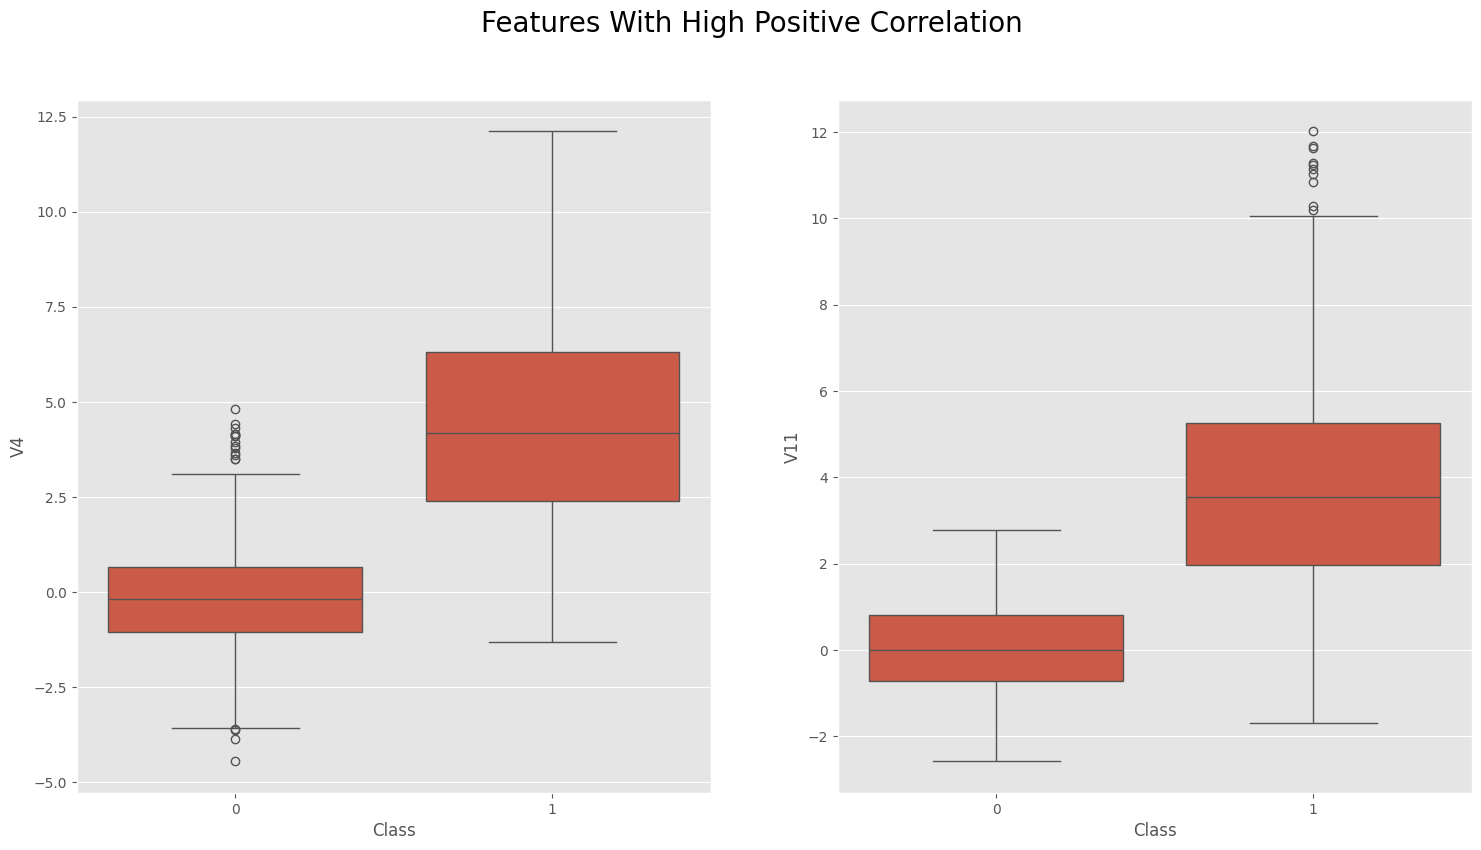

In [43]:

#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [44]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]



In [45]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))


We reduced our data size from 898 transactions by 253 transactions to 645 transactions.


In [46]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']


In [47]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

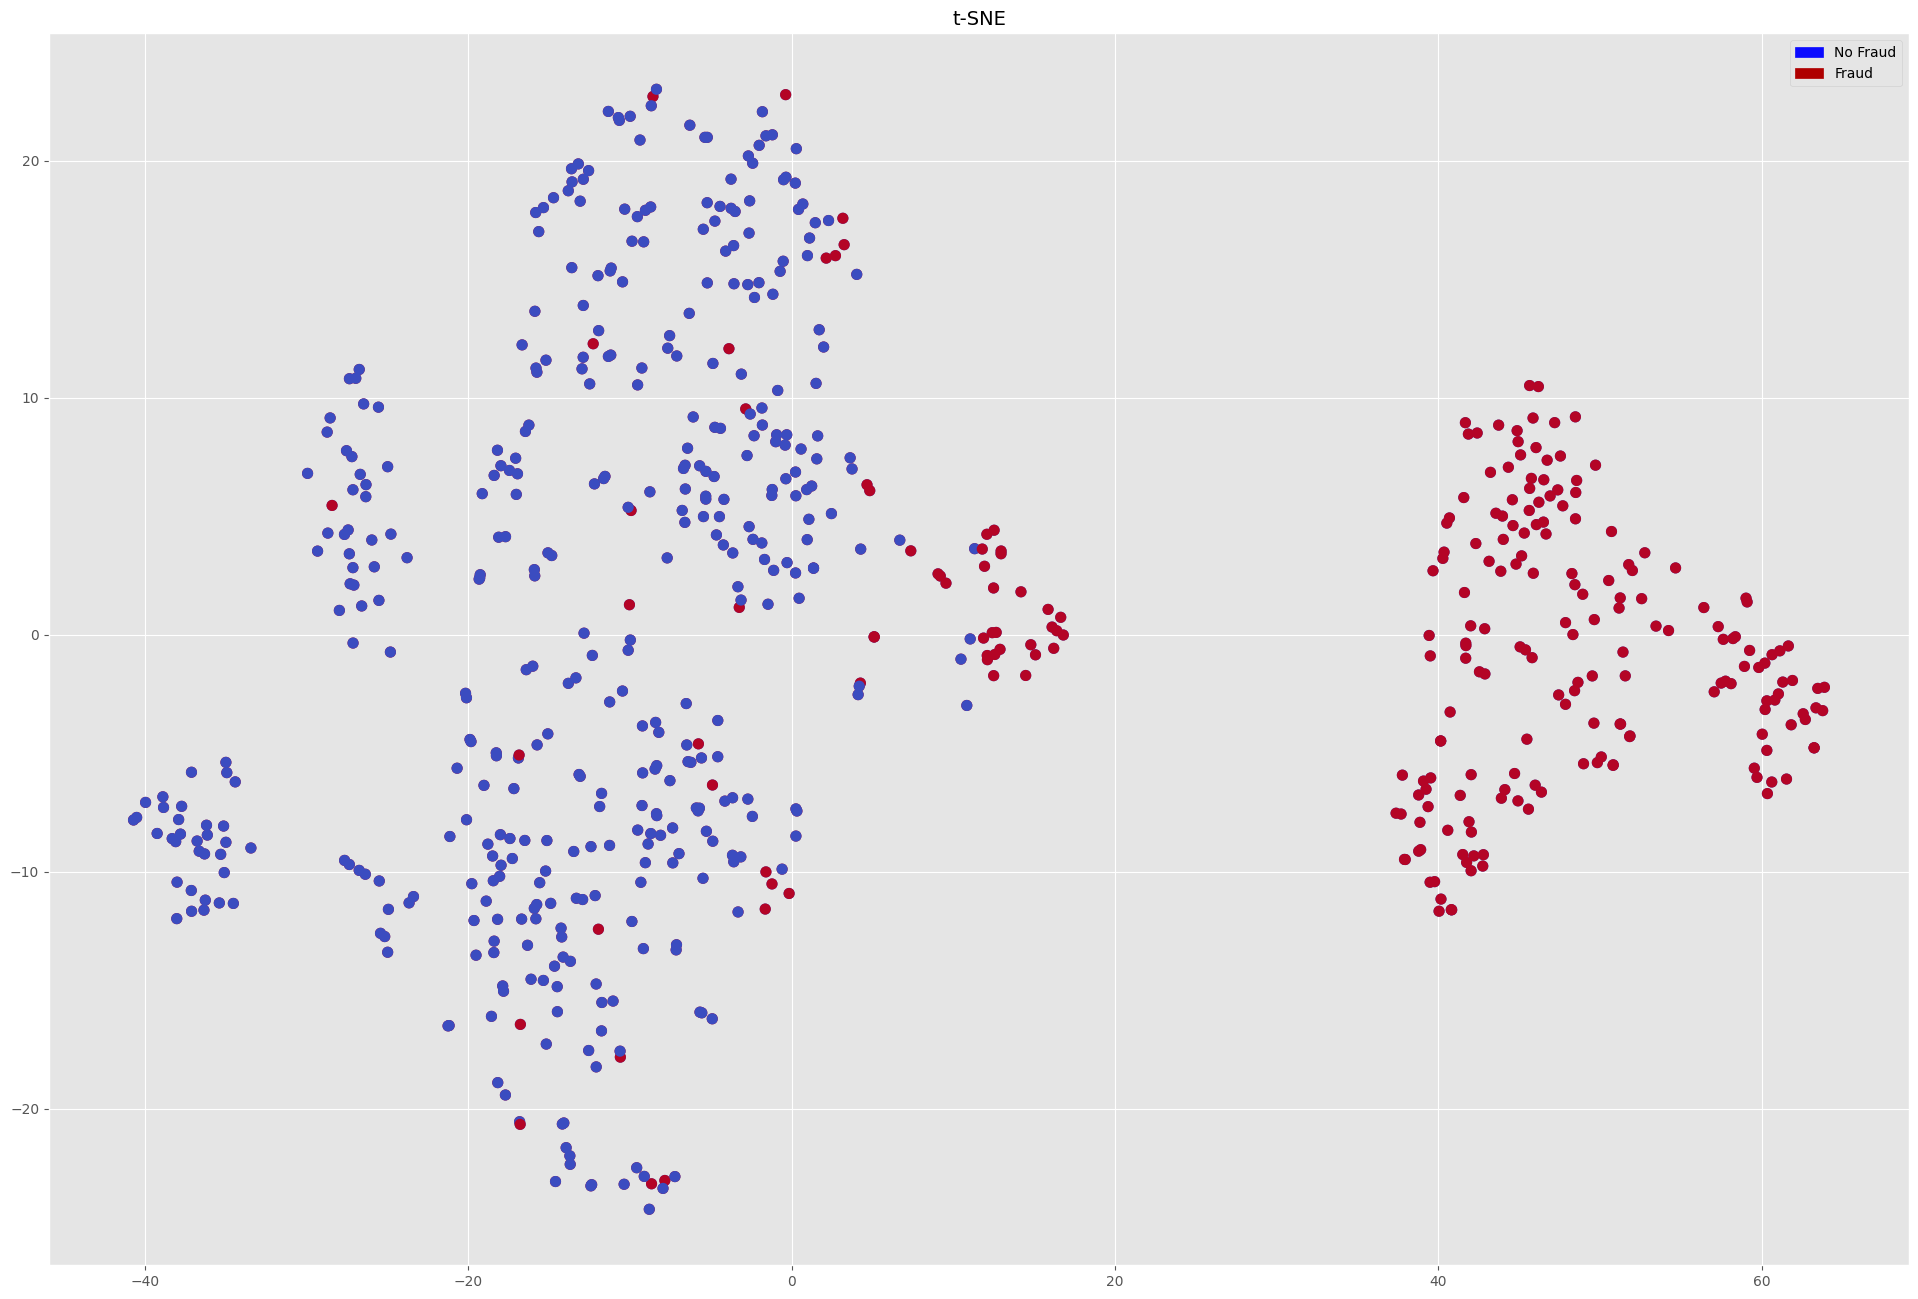

In [48]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


In [49]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [50]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:

X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [52]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)


X_shapes:
 X_train: X_validation:
 (516, 30) (129, 30) 

Y_shapes:
 Y_train: Y_validation:
 (516,) (129,)


In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [55]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle =True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.971692 (0.020839)
LDA: 0.974612 (0.016605)
KNN: 0.963964 (0.021553)
CART: 0.902913 (0.032062)
SVM: 0.974008 (0.019374)
XGB: 0.973683 (0.024332)
RF: 0.971287 (0.023612)


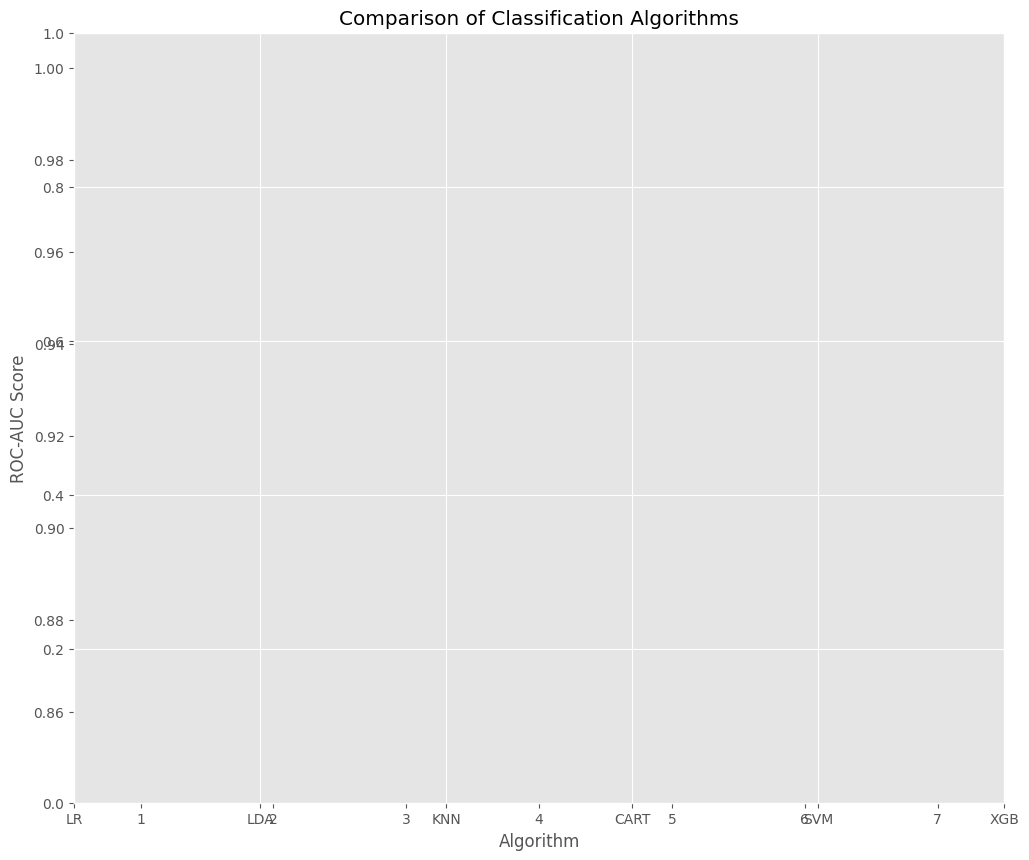

In [58]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()